# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
# train, test 결과 불러오기
# iTransformer, test 결과 불러오기

result_path = './results/'
# cases four
# iTransformer exchange rate (7:2:1)
# iTransformer exchange rate 25mean
# iTransformer exchange rate 101mean

original_iT = 'long_term_forecast_DiTransformer_Exchange_96_96_Mod-iTransformer_data-exchange_rate.csv_(96to96)_0(1727413097)'
iT_25mean = 'long_term_forecast_DiTransformer_Exchange_96_96_25mean_Mod-iTransformer_data-exchange_rate_25mean.csv_(96to96)_0(1727413237)'
iT_101mean = 'long_term_forecast_DiTransformer_Exchange_96_96_101mean_Mod-iTransformer_data-exchange_rate_101mean.csv_(96to96)_0(1727413382)'

In [3]:
obj_list = ['pred.npy', 'true.npy']
# obj_train_list = ['pred_train.npy', 'true_train.npy']

# original부터 불러기기
# np_train_pred = np.load(result_path + original_iT + '/' + obj_train_list[0]) 
# np_train_true = np.load(result_path + original_iT + '/' + obj_train_list[1]) 
np_test_pred = np.load(result_path + original_iT + '/' + obj_list[0]) 
np_test_true = np.load(result_path + original_iT + '/' + obj_list[1]) 
np_test_pred_25 = np.load(result_path + iT_25mean + '/' + obj_list[0]) 
np_test_true_25 = np.load(result_path + iT_25mean + '/' + obj_list[1]) 
np_test_pred_101 = np.load(result_path + iT_101mean + '/' + obj_list[0]) 
np_test_true_101 = np.load(result_path + iT_101mean + '/' + obj_list[1]) 

In [4]:
from utils.metrics import *

In [5]:
%matplotlib inline

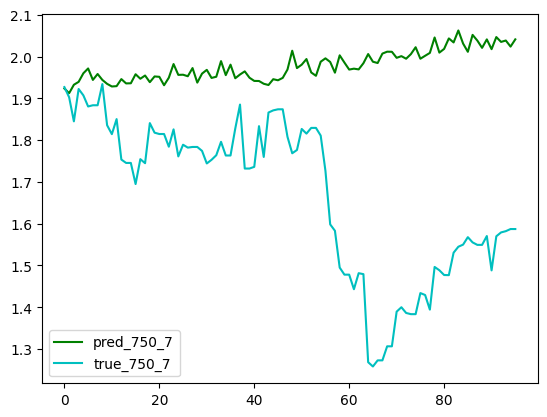

MSE
0.14210497
MAE
0.31114808
SMAE
-0.3110764
REC_CORR
-0.686830171602849
STD_RATIO
2.685114622116089
SLOPE_RATIO
-0.6002494932320606


In [6]:
idx = 750
val = 7
xr = range(96)
plt.plot(xr, np_test_pred[idx, :, val],'g', label=f'pred_{idx}_{val}' )
plt.plot(xr, np_test_true[idx, :, val],'c', label=f'true_{idx}_{val}' )
plt.legend()
plt.show()

print("MSE")
print(MSE(np_test_pred[idx, :, val], np_test_true[idx, :, val]))
print("MAE")
print(MAE(np_test_pred[idx, :, val], np_test_true[idx, :, val]))
print("SMAE")
print(SMAE(np_test_pred[idx, :, val], np_test_true[idx, :, val]))
print("REC_CORR")
print(np.corrcoef(np_test_pred[idx, :, val], np_test_true[idx, :, val])[0,1])
print("STD_RATIO")
print(1/2*(np.std(np_test_true[idx, :, val])/np.std(np_test_pred[idx, :, val]) + np.std(np_test_pred[idx, :, val])/np.std(np_test_true[idx, :, val]) ))
print("SLOPE_RATIO")
print(len(xr)*(get_slope(np.array(xr), np_test_true[idx, :, val])-get_slope(np.array(xr), np_test_pred[idx, :, val])))

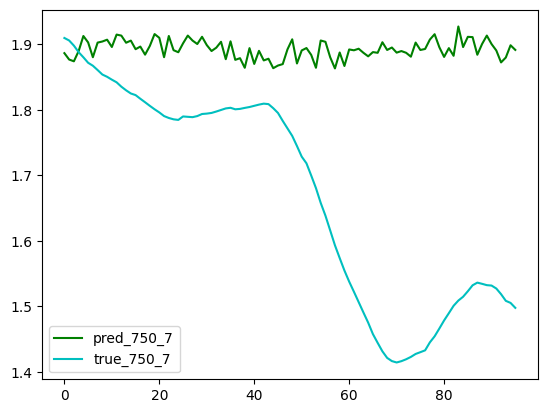

MSE
0.07505008
MAE
0.22150971
SMAE
-0.21992408
REC_CORR
-0.0065035027902195855
STD_RATIO
5.8679962158203125
SLOPE_RATIO
-0.5049648285688293


In [7]:
plt.plot(xr, np_test_pred_25[idx, :, val],'g', label=f'pred_{idx}_{val}' )
plt.plot(xr, np_test_true_25[idx, :, val],'c', label=f'true_{idx}_{val}' )
plt.legend()
plt.show()

print("MSE")
print(MSE(np_test_pred_25[idx, :, val], np_test_true_25[idx, :, val]))
print("MAE")
print(MAE(np_test_pred_25[idx, :, val], np_test_true_25[idx, :, val]))
print("SMAE")
print(SMAE(np_test_pred_25[idx, :, val], np_test_true_25[idx, :, val]))
print("REC_CORR")
print(np.corrcoef(np_test_pred_25[idx, :, val], np_test_true_25[idx, :, val])[0,1])
print("STD_RATIO")
print(1/2*(np.std(np_test_true_25[idx, :, val])/np.std(np_test_pred_25[idx, :, val]) + np.std(np_test_pred_25[idx, :, val])/np.std(np_test_true_25[idx, :, val]) ))
print("SLOPE_RATIO")
print(len(xr)*(get_slope(np.array(xr), np_test_true_25[idx, :, val])-get_slope(np.array(xr), np_test_pred_25[idx, :, val])))

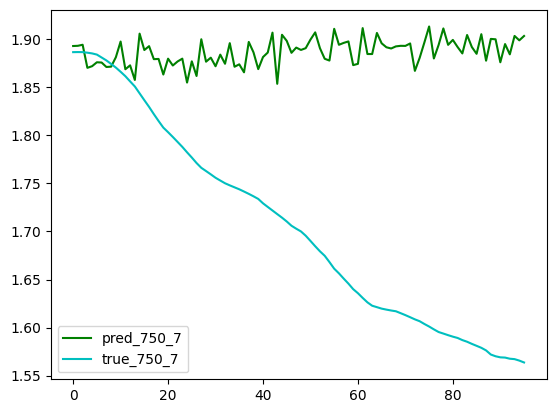

MSE
0.045132685
MAE
0.18260087
SMAE
-0.18151905
REC_CORR
-0.44002128919973005
STD_RATIO
3.9031643867492676
SLOPE_RATIO
-0.3765466984238106


In [8]:
plt.plot(xr, np_test_pred_101[idx, :, val],'g', label=f'pred_{idx}_{val}' )
plt.plot(xr, np_test_true_101[idx, :, val],'c', label=f'true_{idx}_{val}' )
plt.legend()
plt.show()

print("MSE")
print(MSE(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val]))
print("MAE")
print(MAE(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val]))
print("SMAE")
print(SMAE(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val]))
print("REC_CORR")
print(np.corrcoef(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val])[0,1])
print("STD_RATIO")
print(1/2*(np.std(np_test_true_101[idx, :, val])/np.std(np_test_pred_101[idx, :, val]) + np.std(np_test_pred_101[idx, :, val])/np.std(np_test_true_101[idx, :, val]) ))
print("SLOPE_RATIO")
print(len(xr)*(get_slope(np.array(xr), np_test_true_101[idx, :, val])-get_slope(np.array(xr), np_test_pred_101[idx, :, val])))

In [9]:
MSE(np_test_pred, np_test_true), MSE(np_test_pred_25, np_test_true_25), MSE(np_test_pred_101, np_test_true_101)

(0.09395402, 0.070743635, 0.029601011)

In [10]:
MSE(np_test_pred[:,:,-1], np_test_true[:,:,-1]), MSE(np_test_pred_25[:,:,-1], np_test_true_25[:,:,-1]), MSE(np_test_pred_101[:,:,-1], np_test_true_101[:,:,-1])

(0.10945865, 0.08108088, 0.030757746)

In [11]:
MAE(np_test_pred, np_test_true), MAE(np_test_pred_25, np_test_true_25), MAE(np_test_pred_101, np_test_true_101)

(0.21627697, 0.18268037, 0.112623215)

In [12]:
MAE(np_test_pred[:,:,-1], np_test_true[:,:,-1]), MAE(np_test_pred_25[:,:,-1], np_test_true_25[:,:,-1]), MAE(np_test_pred_101[:,:,-1], np_test_true_101[:,:,-1])

(0.24725202, 0.20652996, 0.12579939)

In [13]:
STD_RATIO(np_test_pred, np_test_true), STD_RATIO(np_test_pred_25, np_test_true_25), STD_RATIO(np_test_pred_101, np_test_true_101)

(3.3329883, 3.2187438, 2.282145)

In [14]:
STD_RATIO(np_test_pred[:,:,-1:], np_test_true[:,:,-1:]), STD_RATIO(np_test_pred_25[:,:,-1:], np_test_true_25[:,:,-1:]), STD_RATIO(np_test_pred_101[:,:,-1:], np_test_true_101[:,:,-1:])

(2.9421318, 3.1770887, 2.5058782)

In [15]:
SLOPE_RATIO(np_test_pred, np_test_true), SLOPE_RATIO(np_test_pred_25, np_test_true_25), SLOPE_RATIO(np_test_pred_101, np_test_true_101)

(0.3352817489704115, 0.3281156984633011, 0.228475622952316)

In [16]:
SLOPE_RATIO(np_test_pred[:,:,-1:], np_test_true[:,:,-1:]), SLOPE_RATIO(np_test_pred_25[:,:,-1:], np_test_true_25[:,:,-1:]), SLOPE_RATIO(np_test_pred_101[:,:,-1:], np_test_true_101[:,:,-1:])

(0.3578889590775162, 0.36190538751771245, 0.2503541408136312)

In [17]:
SMAE(np_test_pred, np_test_true), SMAE(np_test_pred_25, np_test_true_25), SMAE(np_test_pred_101, np_test_true_101)

(-0.07220951, -0.052165173, -0.043785334)

In [18]:
STD_RATIO(np_test_true, np_test_true_25), STD_RATIO(np_test_true, np_test_true_101), STD_RATIO(np_test_true_25, np_test_true_101)

(1.0720118, 1.4664724, 1.2240558)

In [19]:
STD_RATIO(np_test_pred, np_test_pred_25), STD_RATIO(np_test_pred, np_test_pred_101), STD_RATIO(np_test_pred_25, np_test_pred_101)

(1.1556376, 1.5255551, 1.4938622)

In [20]:
SLOPE_RATIO(np_test_true, np_test_true_25), SLOPE_RATIO(np_test_true, np_test_true_101), SLOPE_RATIO(np_test_true_25, np_test_true_101)

(0.017954069286025158, 0.11838999085184553, 0.10652318496278251)

In [21]:
SLOPE_RATIO(np_test_pred, np_test_pred_25), SLOPE_RATIO(np_test_pred, np_test_pred_101), SLOPE_RATIO(np_test_pred_25, np_test_pred_101)

(0.057304218405394, 0.12769988348211184, 0.130681100472436)

In [22]:
MSE(np_test_true, np_test_true_25), MSE(np_test_true, np_test_true_101), MSE(np_test_true_25, np_test_true_101)

(0.0050660786, 0.015470146, 0.0074156034)

In [23]:
MSE(np_test_pred, np_test_pred_25), MSE(np_test_pred, np_test_pred_101), MSE(np_test_pred_25, np_test_pred_101)

(0.011647427, 0.036930736, 0.029039068)

In [24]:
MAE(np_test_true, np_test_true_25), MAE(np_test_true, np_test_true_101), MAE(np_test_true_25, np_test_true_101)

(0.0451016, 0.0875789, 0.063297205)

In [25]:
MAE(np_test_pred, np_test_pred_25), MAE(np_test_pred, np_test_pred_101), MAE(np_test_pred_25, np_test_pred_101)

(0.07513009, 0.1408377, 0.124152616)

In [26]:
# 표준편차 평균

In [27]:
np.mean([[np.std(np_test_pred[B, :, N]) for N in range(np_test_true.shape[2])] for B in range(np_test_true.shape[0])]), np.mean([[np.std(np_test_true[B, :, N]) for N in range(np_test_true.shape[2])] for B in range(np_test_true.shape[0])])

(0.031230127, 0.14114161)

In [28]:
np.mean([[np.std(np_test_pred_25[B, :, N]) for N in range(np_test_true.shape[2])] for B in range(np_test_true.shape[0])]), np.mean([[np.std(np_test_true_25[B, :, N]) for N in range(np_test_true.shape[2])] for B in range(np_test_true.shape[0])])

(0.030508785, 0.11551998)

In [29]:
np.mean([[np.std(np_test_pred_101[B, :, N]) for N in range(np_test_true.shape[2])] for B in range(np_test_true.shape[0])]), np.mean([[np.std(np_test_true_101[B, :, N]) for N in range(np_test_true.shape[2])] for B in range(np_test_true.shape[0])])

(0.0325614, 0.082146)

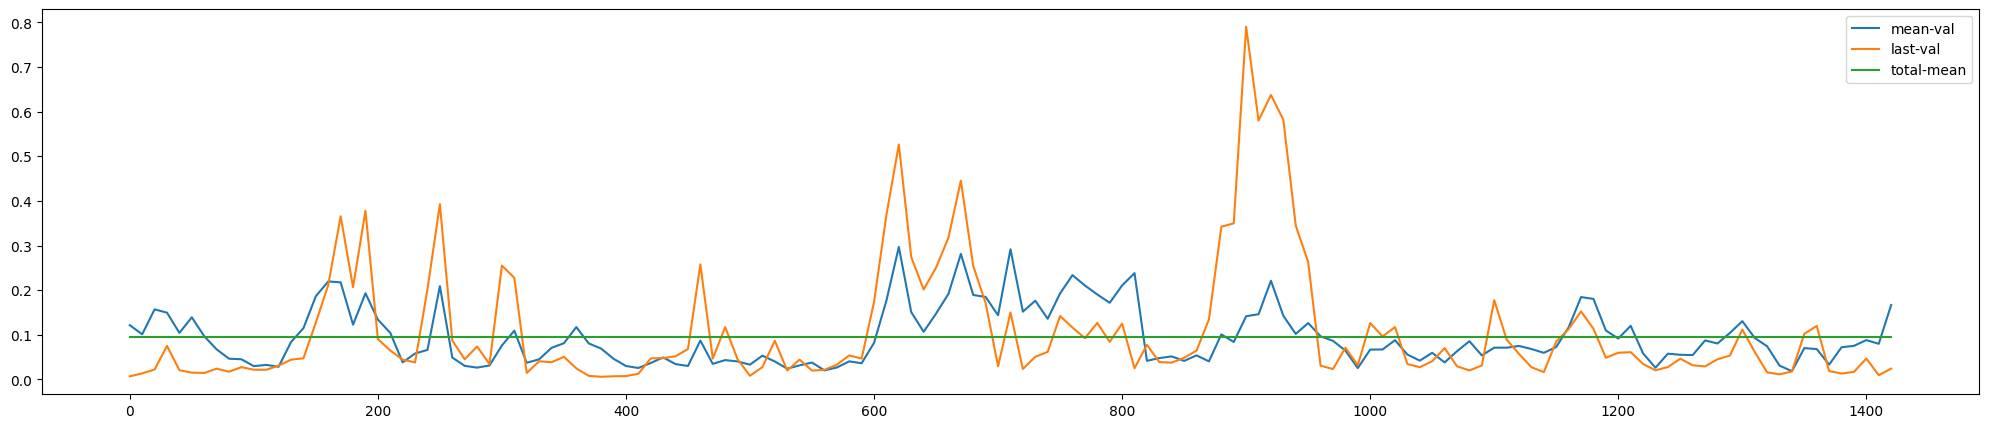

In [30]:
# MSE_DITRIB
xr = list(range(0, len(np_test_pred), 10))
yr_mean = []
yr_last = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean.append(MSE(np_test_pred[idx, :, :], np_test_true[idx, :, :]))
    yr_last.append(MSE(np_test_pred[idx, :, -1], np_test_true[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean, label='mean-val')
plt.plot(xr, yr_last, label='last-val')
plt.plot(xr, np.mean(yr_mean) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


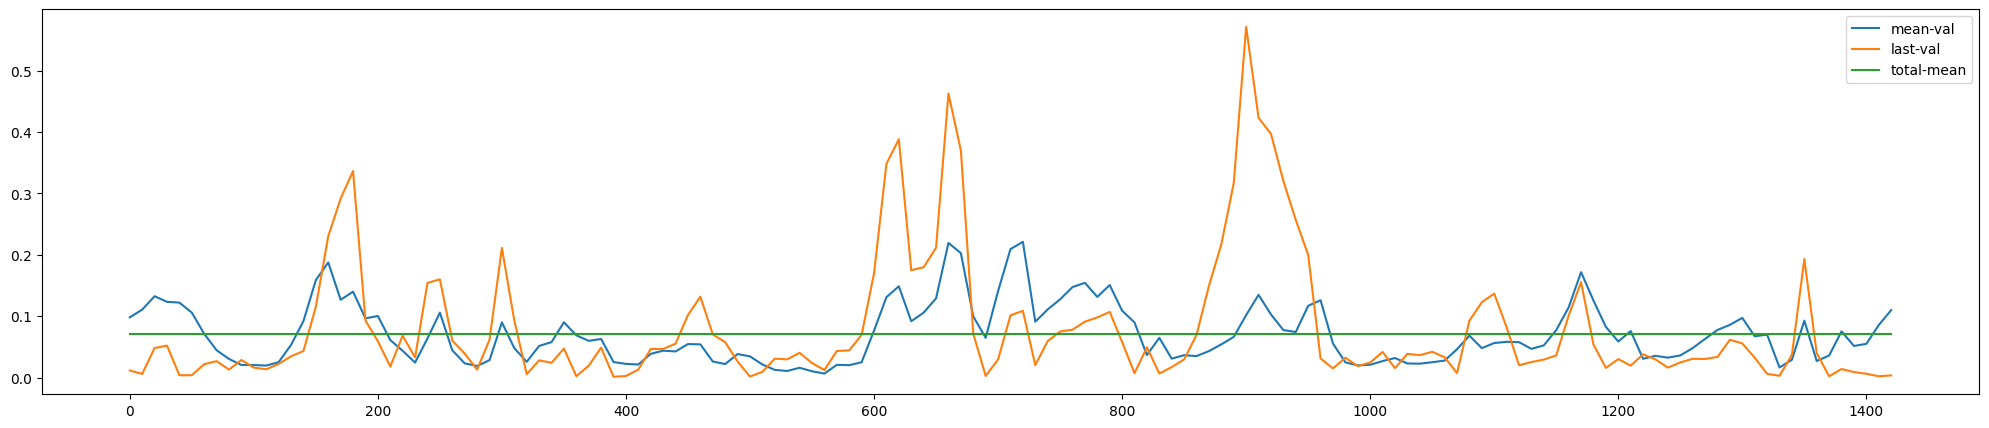

In [31]:
# MSE_DITRIB
xr = list(range(0, len(np_test_pred_25), 10))
yr_mean_25 = []
yr_last_25 = []
for idx in range(0, len(np_test_pred_25), 10):
    yr_mean_25.append(MSE(np_test_pred_25[idx, :, :], np_test_true_25[idx, :, :]))
    yr_last_25.append(MSE(np_test_pred_25[idx, :, -1], np_test_true_25[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_25, label='mean-val')
plt.plot(xr, yr_last_25, label='last-val')
plt.plot(xr, np.mean(yr_mean_25) * np.ones(len(yr_mean_25)), label='total-mean')
plt.legend()
plt.show()


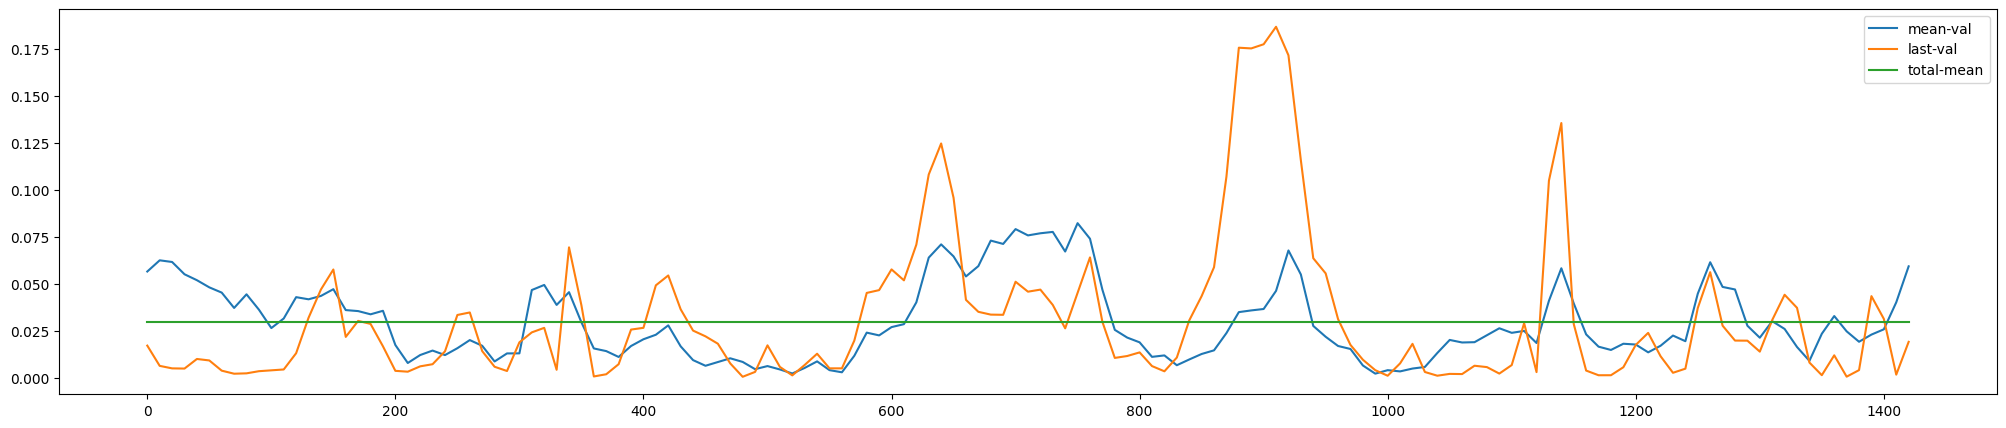

In [32]:
# MSE_DITRIB
xr = list(range(0, len(np_test_pred_101), 10))
yr_mean_101 = []
yr_last_101 = []
for idx in range(0, len(np_test_pred_101), 10):
    yr_mean_101.append(MSE(np_test_pred_101[idx, :, :], np_test_true_101[idx, :, :]))
    yr_last_101.append(MSE(np_test_pred_101[idx, :, -1], np_test_true_101[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_101, label='mean-val')
plt.plot(xr, yr_last_101, label='last-val')
plt.plot(xr, np.mean(yr_mean_101) * np.ones(len(yr_mean_101)), label='total-mean')
plt.legend()
plt.show()


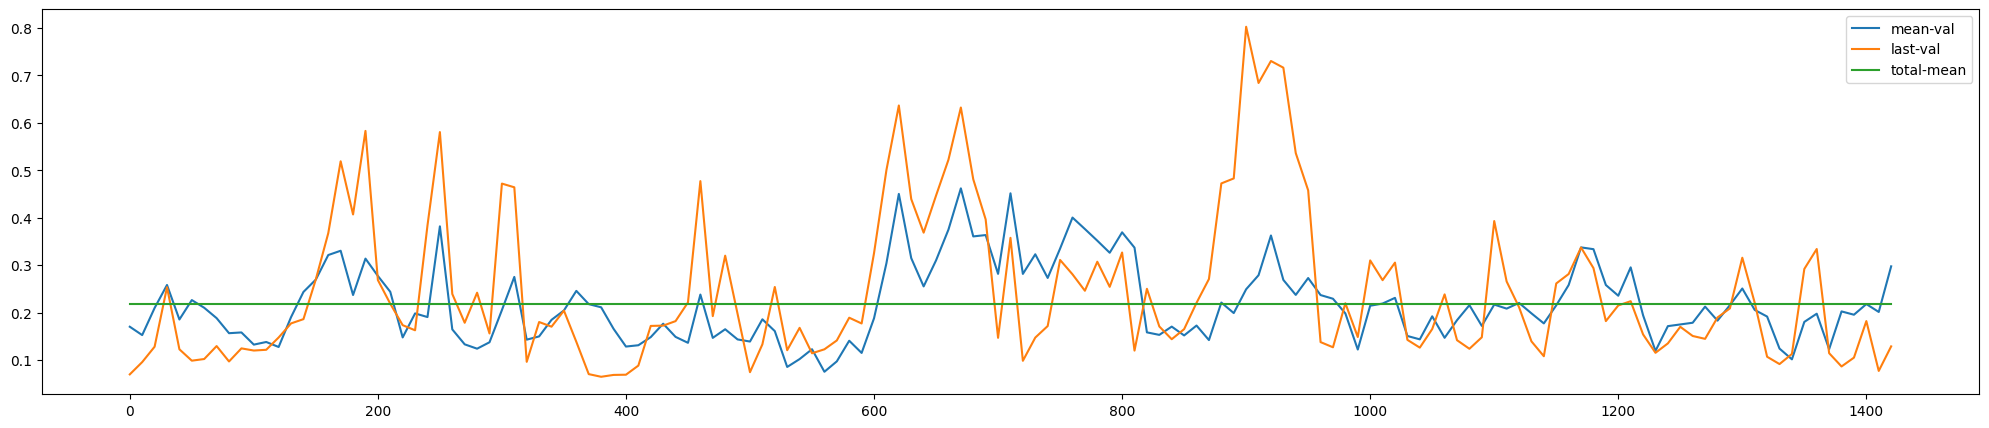

In [33]:
# MAE_DITRIB
yr_mean_mae = []
yr_last_mae = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_mae.append(MAE(np_test_pred[idx, :, :], np_test_true[idx, :, :]))
    yr_last_mae.append(MAE(np_test_pred[idx, :, -1], np_test_true[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_mae, label='mean-val')
plt.plot(xr, yr_last_mae, label='last-val')
plt.plot(xr, np.mean(yr_mean_mae) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


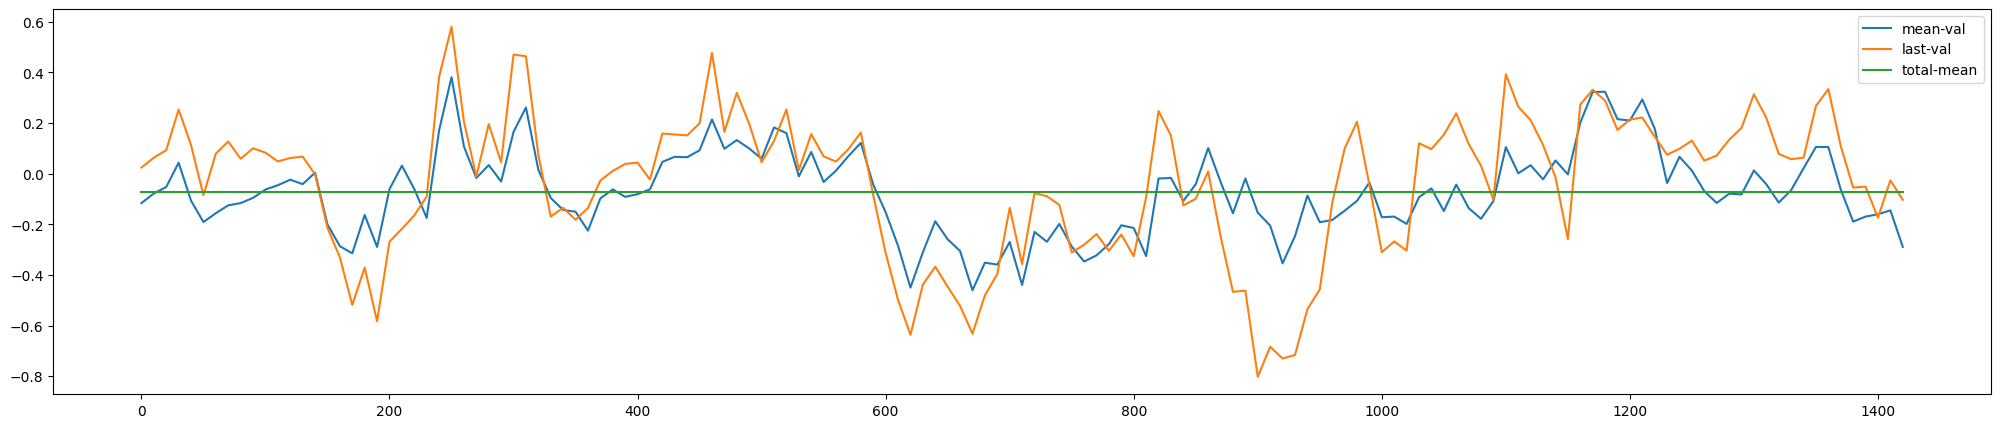

In [34]:
# SMAE_DITRIB
yr_mean_smae = []
yr_last_smae = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_smae.append(SMAE(np_test_pred[idx, :, :], np_test_true[idx, :, :]))
    yr_last_smae.append(SMAE(np_test_pred[idx, :, -1], np_test_true[idx, :, -1]))

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_smae, label='mean-val')
plt.plot(xr, yr_last_smae, label='last-val')
plt.plot(xr, np.mean(yr_mean_smae) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


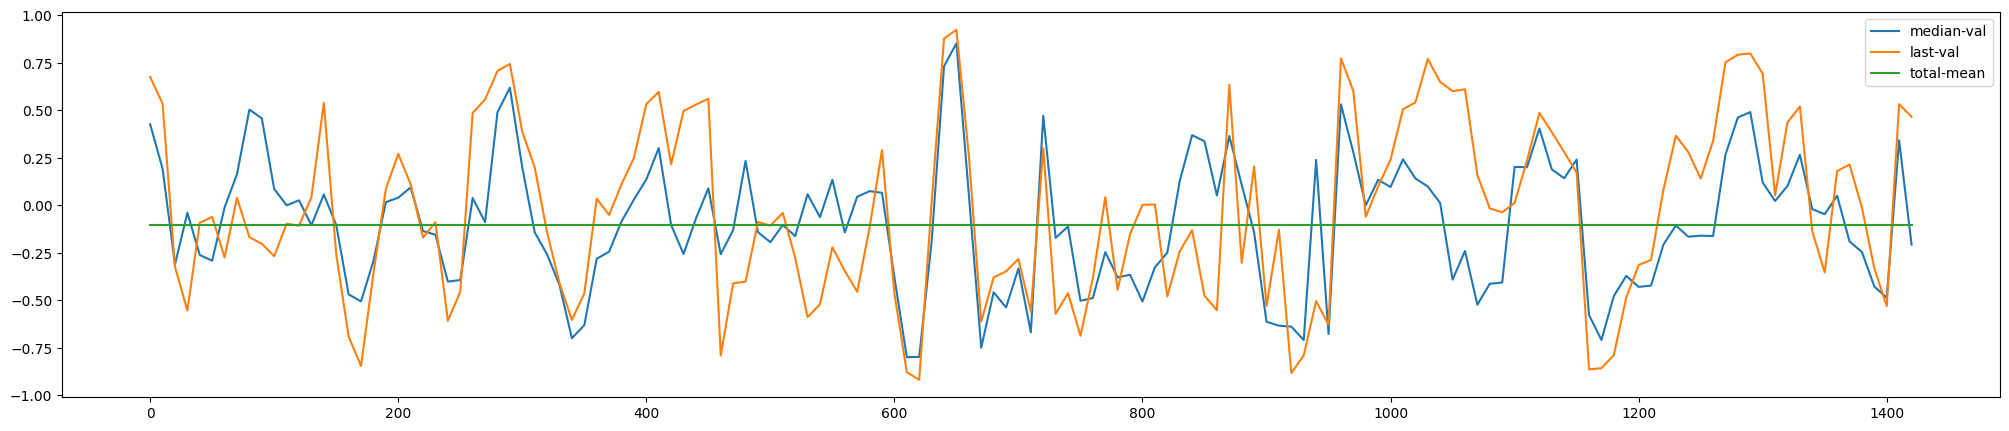

In [35]:
# CORR_DITRIB
yr_mean_corr = []
yr_last_corr = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_corr.append(REC_CORR(np_test_pred[idx, :, :], np_test_true[idx, :, :], 'median'))
    yr_last_corr.append(np.corrcoef(np_test_pred[idx, :, -1], np_test_true[idx, :, -1])[0,1])

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_corr, label='median-val')
plt.plot(xr, yr_last_corr, label='last-val')
plt.plot(xr, np.median(yr_mean_corr) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


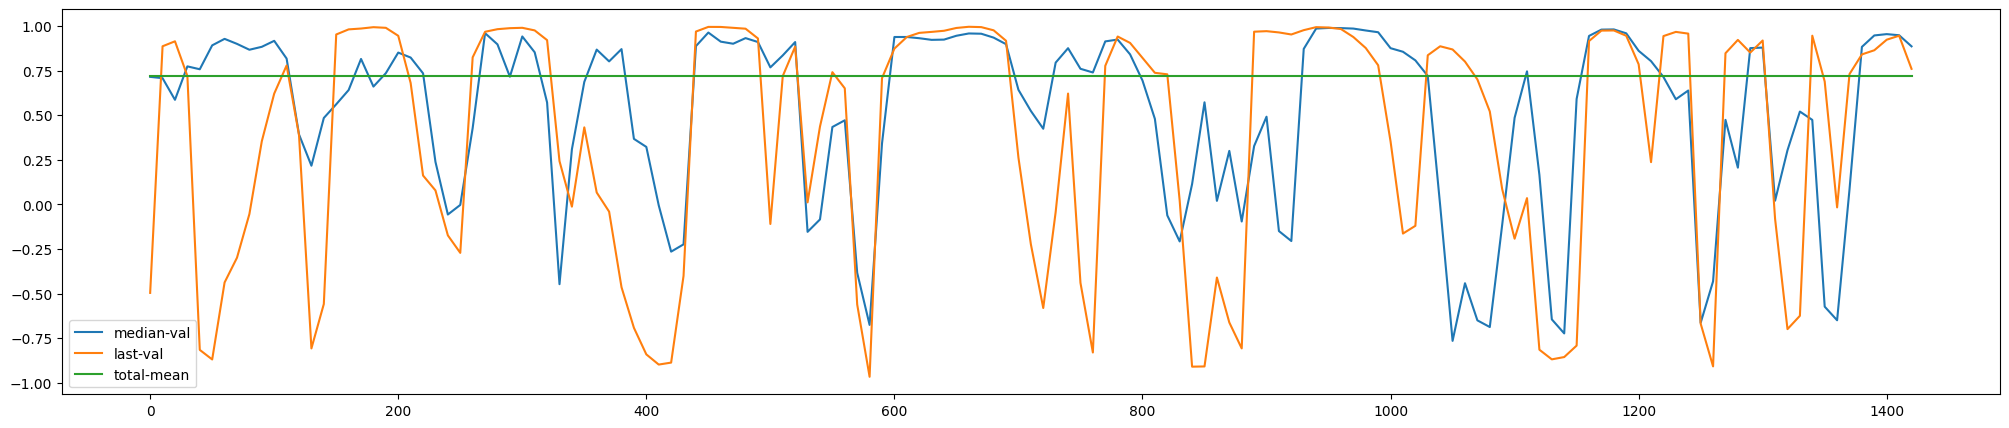

In [36]:
# CORR_DITRIB
yr_mean_corr_101 = []
yr_last_corr_101 = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_corr_101.append(REC_CORR(np_test_pred_101[idx, :, :], np_test_true_101[idx, :, :], 'median'))
    yr_last_corr_101.append(np.corrcoef(np_test_pred_101[idx, :, -1], np_test_true_101[idx, :, -1])[0,1])

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_corr_101, label='median-val')
plt.plot(xr, yr_last_corr_101, label='last-val')
plt.plot(xr, np.median(yr_mean_corr_101) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


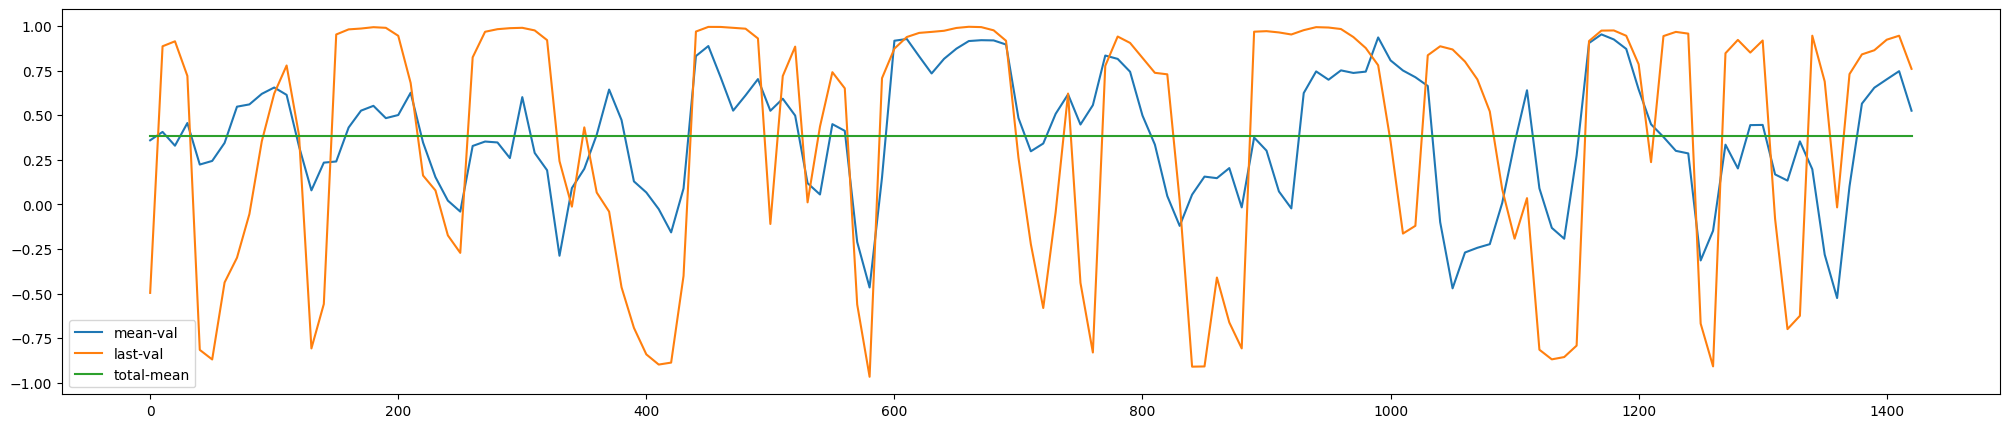

In [37]:
# CORR_DITRIB
yr_mean_corr_101_2 = []
yr_last_corr_101_2 = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_corr_101_2.append(REC_CORR(np_test_pred_101[idx, :, :], np_test_true_101[idx, :, :], 'mean'))
    yr_last_corr_101_2.append(np.corrcoef(np_test_pred_101[idx, :, -1], np_test_true_101[idx, :, -1])[0,1])

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_corr_101_2, label='mean-val')
plt.plot(xr, yr_last_corr_101_2, label='last-val')
plt.plot(xr, np.mean(yr_mean_corr_101_2) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


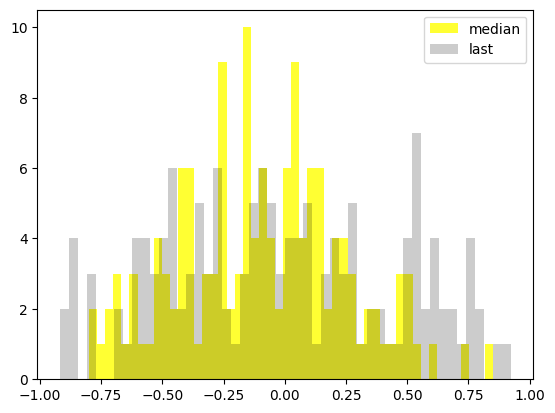

In [38]:
# histogram 분석
plt.hist(yr_mean_corr, color = 'yellow', alpha = 0.8, bins = 50, label='median')
plt.hist(yr_last_corr, color = 'black', alpha = 0.2, bins = 50, label='last')
plt.legend()
plt.show()

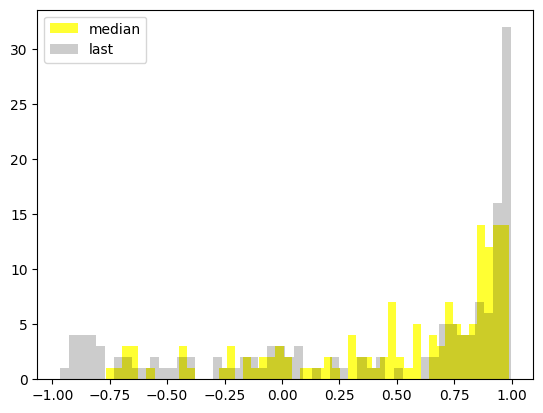

In [39]:
# histogram 분석
plt.hist(yr_mean_corr_101, color = 'yellow', alpha = 0.8, bins = 50, label='median')
plt.hist(yr_last_corr_101, color = 'black', alpha = 0.2, bins = 50, label='last')
plt.legend()
plt.show()

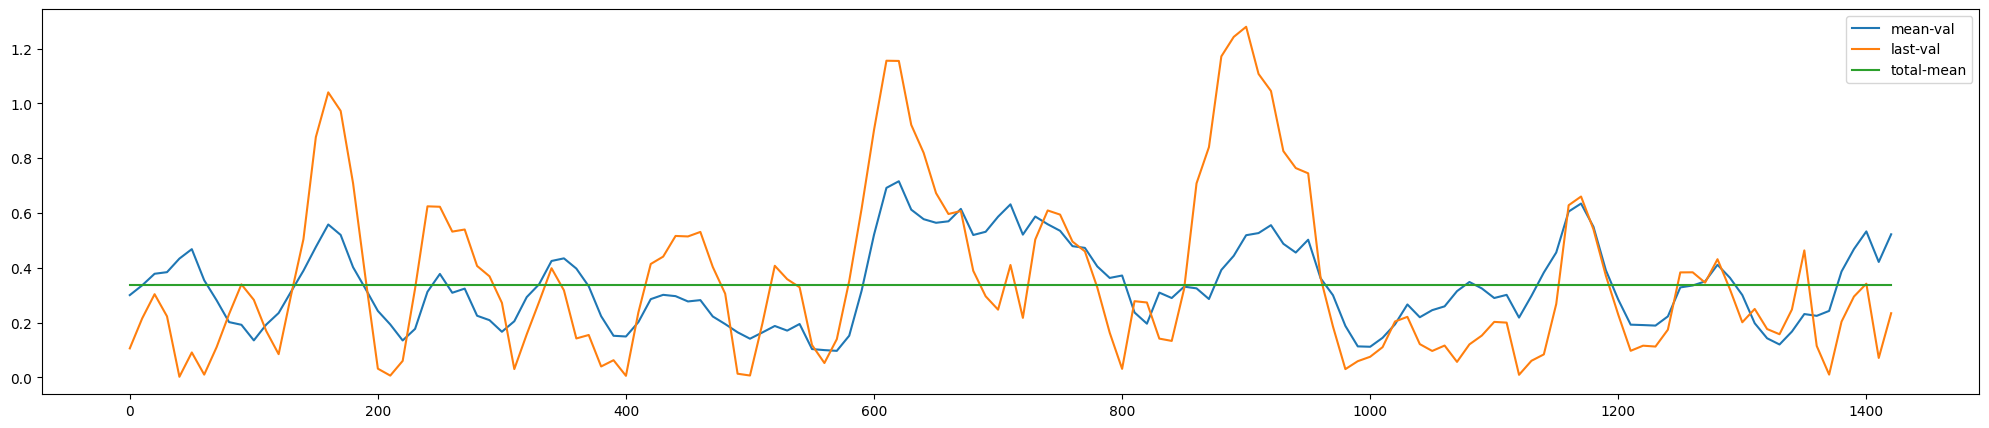

In [40]:
# SLOPE_DITRIB
xr = list(range(0, len(np_test_pred), 10))
yr_mean_slope = []
yr_last_slope = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_slope.append(SLOPE_RATIO(np_test_pred[idx, :, :], np_test_true[idx, :, :]) )
    yr_last_slope.append(SLOPE_RATIO(np_test_pred[idx, :, -1:], np_test_true[idx, :, -1:]) )

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_slope, label='mean-val')
plt.plot(xr, yr_last_slope, label='last-val')
plt.plot(xr, np.mean(yr_mean_slope) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


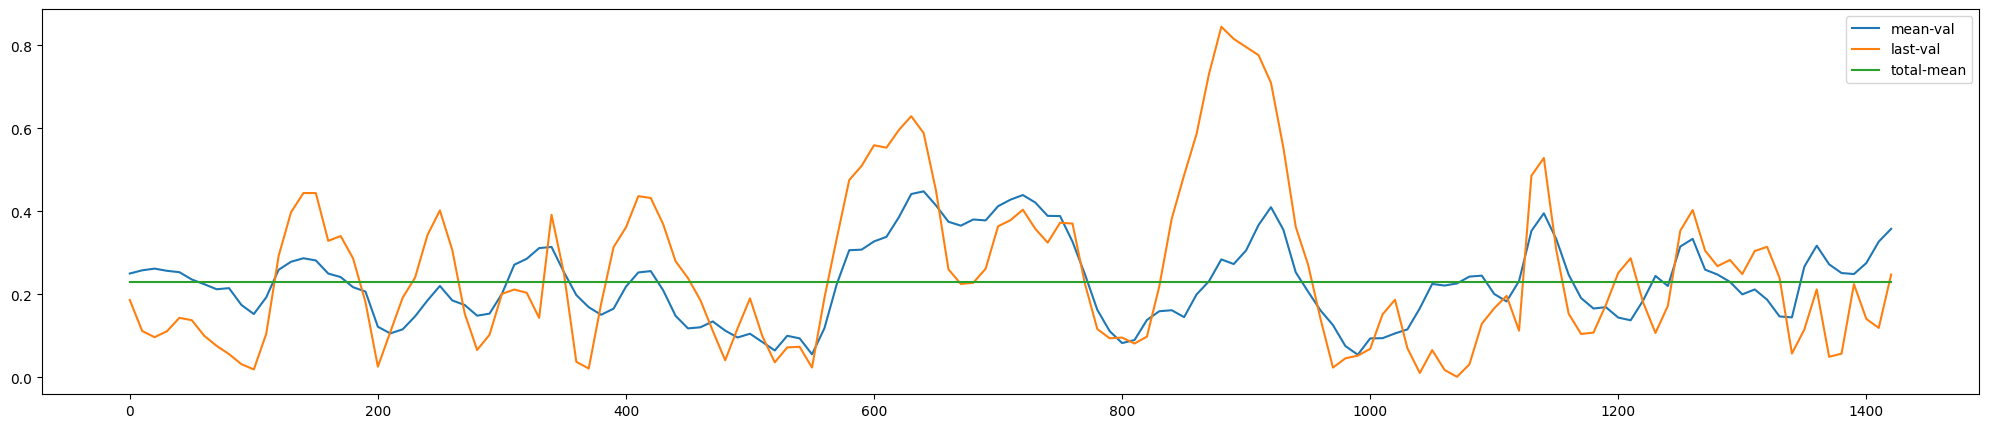

In [41]:
# SLOPE_DITRIB
xr = list(range(0, len(np_test_pred), 10))
yr_mean_slope_101 = []
yr_last_slope_101 = []
for idx in range(0, len(np_test_pred), 10):
    yr_mean_slope_101.append(SLOPE_RATIO(np_test_pred_101[idx, :, :], np_test_true_101[idx, :, :]) )
    yr_last_slope_101.append(SLOPE_RATIO(np_test_pred_101[idx, :, -1:], np_test_true_101[idx, :, -1:]) )

plt.figure(figsize=(25,5))
plt.plot(xr, yr_mean_slope_101, label='mean-val')
plt.plot(xr, yr_last_slope_101, label='last-val')
plt.plot(xr, np.mean(yr_mean_slope_101) * np.ones(len(yr_mean)), label='total-mean')
plt.legend()
plt.show()


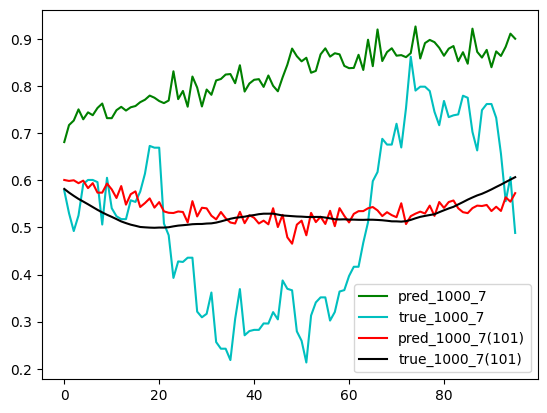

MSE
0.12634742
0.0009864246
MAE
0.31017044
0.025893345
SMAE
-0.31017044
-0.010052171
REC_CORR
0.24043309078295033
0.35302329699302337
STD_RATIO
1.7765677
1.0027299
SLOPE_RATIO
0.07526525845463172
0.06859258032336696


In [42]:
idx = 1000
val = 7
xr0 = range(96)
plt.plot(xr0, np_test_pred[idx, :, val],'g', label=f'pred_{idx}_{val}' )
plt.plot(xr0, np_test_true[idx, :, val],'c', label=f'true_{idx}_{val}' )
plt.plot(xr0, np_test_pred_101[idx, :, val],'r', label=f'pred_{idx}_{val}(101)' )
plt.plot(xr0, np_test_true_101[idx, :, val],'k', label=f'true_{idx}_{val}(101)' )
plt.legend()
plt.show()

print("MSE")
print(MSE(np_test_pred[idx, :, val], np_test_true[idx, :, val]))
print(MSE(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val]))
print("MAE")
print(MAE(np_test_pred[idx, :, val], np_test_true[idx, :, val]))
print(MAE(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val]))
print("SMAE")
print(SMAE(np_test_pred[idx, :, val], np_test_true[idx, :, val]))
print(SMAE(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val]))
print("REC_CORR")
print(np.corrcoef(np_test_pred[idx, :, val], np_test_true[idx, :, val])[0,1])
print(np.corrcoef(np_test_pred_101[idx, :, val], np_test_true_101[idx, :, val])[0,1])
print("STD_RATIO")
print(STD_RATIO(np_test_pred[idx:idx+1, :, val:val+1], np_test_true[idx:idx+1, :, val:val+1]))
print(STD_RATIO(np_test_pred_101[idx:idx+1, :, val:val+1], np_test_true_101[idx:idx+1, :, val:val+1]))
print("SLOPE_RATIO")
print(SLOPE_RATIO(np_test_pred[idx:idx+1, :, val:val+1], np_test_true[idx:idx+1, :, val:val+1]))
print(SLOPE_RATIO(np_test_pred_101[idx:idx+1, :, val:val+1], np_test_true_101[idx:idx+1, :, val:val+1]))

In [47]:
iT_401mean = 'long_term_forecast_DiTransformer_Exchange_96_96_101mean_Mod-iTransformer_data-exchange_rate_101mean.csv_(96to96)_0(1727413382)'

In [48]:
np_test_pred_401 = np.load(result_path + iT_401mean + '/' + obj_list[0]) 
np_test_true_401 = np.load(result_path + iT_401mean + '/' + obj_list[1]) 